#### 1. Import libraries

In [15]:
import pandas as pd
import seaborn as sns
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



#### 2. Load the data

#### The dataset comprises the following columns:

1. **Date**: This is the date of the temperature recording in YYYY-MM-DD format.

2. **tmax**: This is the daily maximum temperature in Fahrenheit (°F).

3. **tmin**: This is the daily minimum temperature in Fahrenheit (°F).

4. **prcp**: This is the daily precipitation amount in inches (in).

However, for the tasks in this project, the following columns have been added to the dataset:

1. **City**: This is the name of the city.

2. **Year**: This is the year of the temperature recording.

4. **Month**: This is the month of the temperature recording.

5. **tavg**: This is the daily average temperature in Fahrenheit (°F).

In [16]:
df = pd.read_csv("Dataset.csv")
df.head()

,Date,tmax,tmin,prcp,City,Year,Month,tavg
0,1960-01-01,37.0,24.0,0.00,Boston,1960,Jan,30.5
1,1960-01-02,47.0,23.0,0.00,Boston,1960,Jan,35.0
2,1960-01-03,57.0,37.0,0.92,Boston,1960,Jan,47.0
3,1960-01-04,41.0,33.0,0.00,Boston,1960,Jan,37.0
4,1960-01-05,37.0,27.0,0.00,Boston,1960,Jan,32.0


#### 3. Convert Date column to Datetime Format

In [17]:
df.Date = pd.to_datetime(df.Date)
df.Date.dtype

dtype('<M8[ns]')

#### 4. Get Unique City Names

In [18]:
cities = df.City.unique().tolist()
cities

['Boston', 'Chicago', 'Los Angeles', 'New York', 'Washington DC']

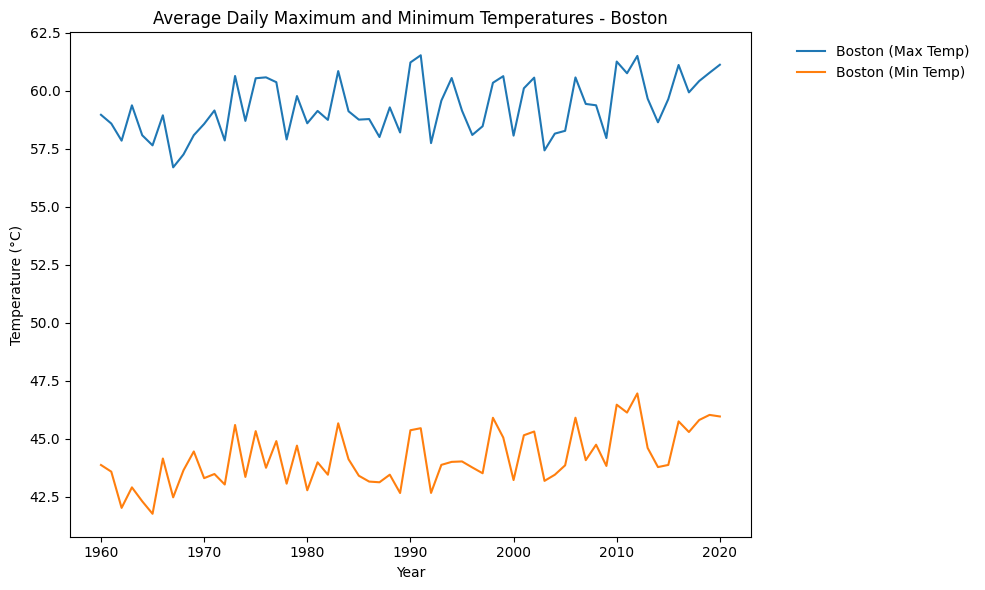

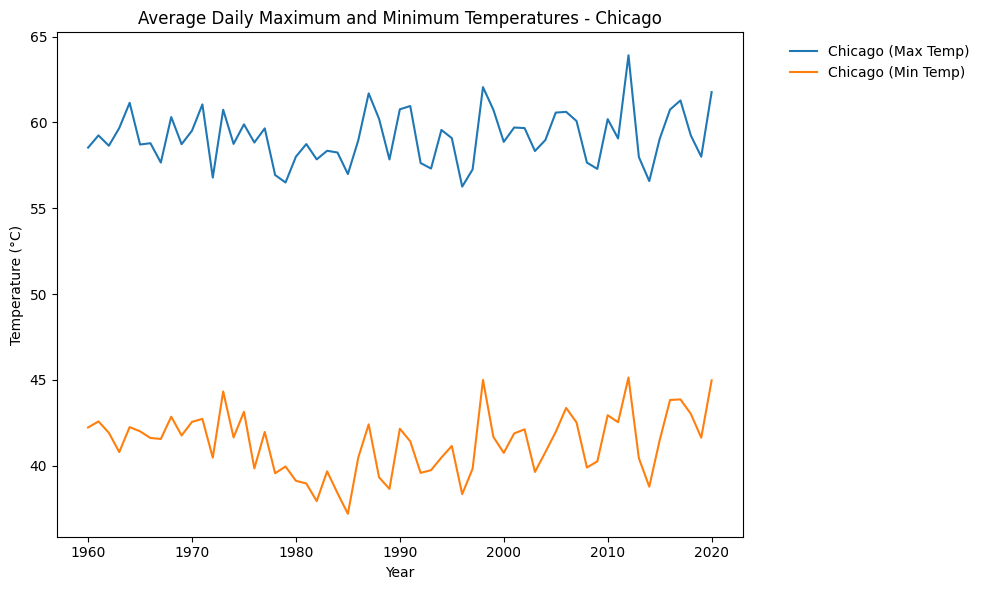

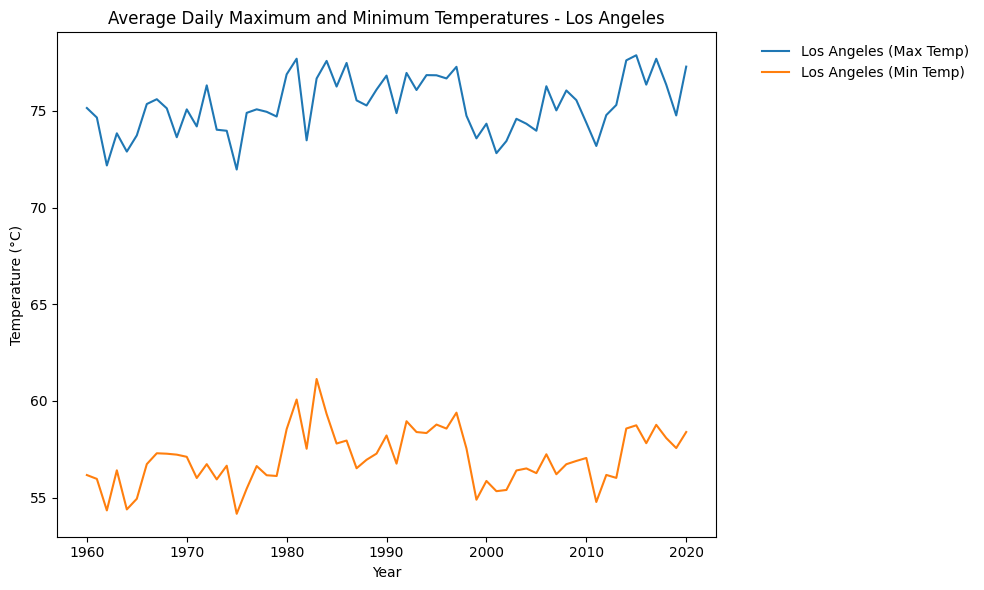

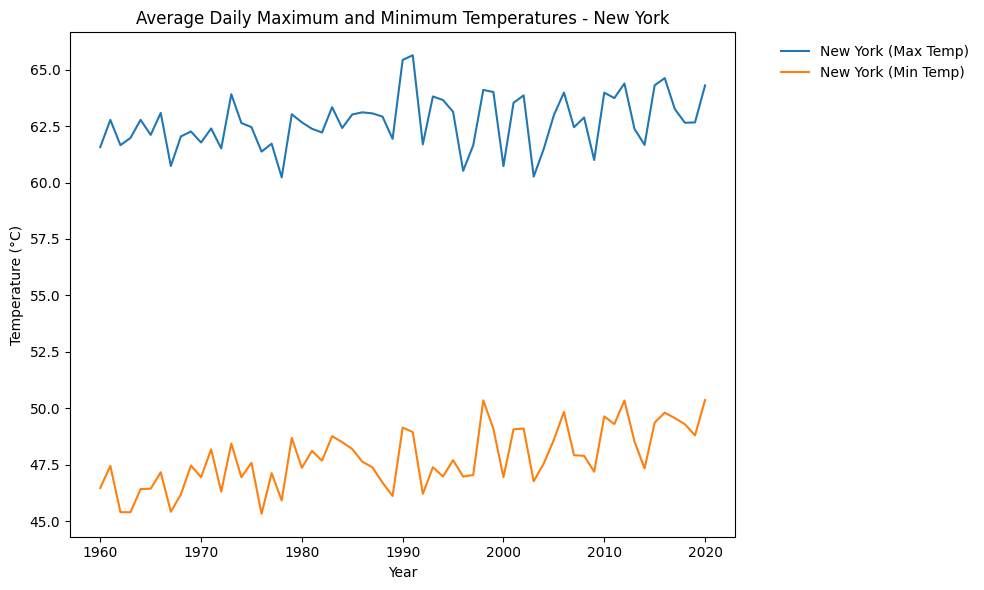

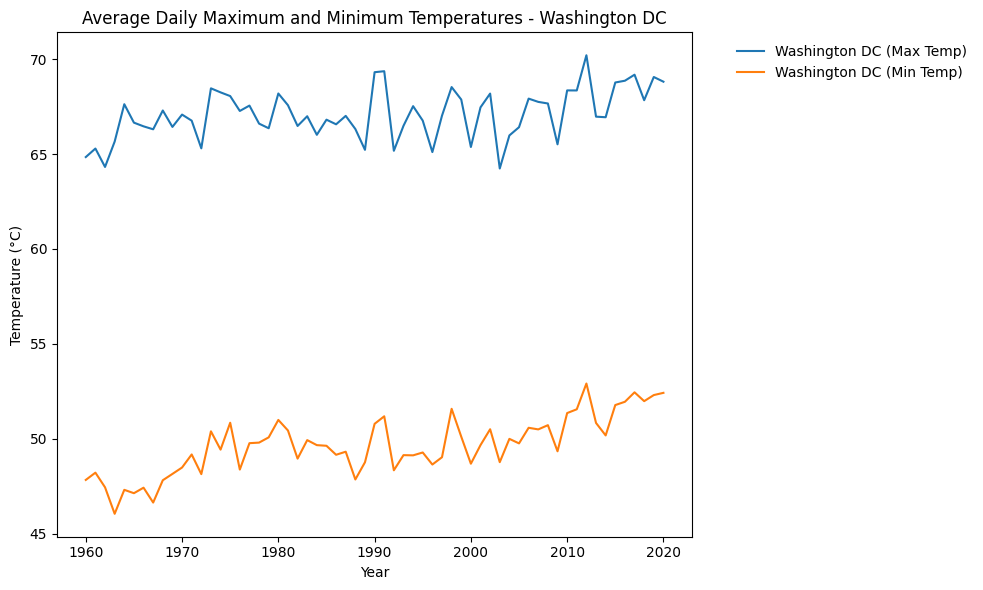

In [ ]:
# iterate over each city
for city in cities:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # filter the data for the current city
    city_data = df[df['City'] == city]
    
    # Calculate the average maximum temperature for each year
    avg_max_temps = city_data.groupby(df['Year'])['tmax'].mean()
    avg_min_temps = city_data.groupby(df['Year'])['tmin'].mean()
    
    # plot the average maximum and minimum temperatures as Lines
    ax.plot(avg_max_temps.index, avg_max_temps, label=f'{city} (Max Temp)')
    ax.plot(avg_min_temps.index, avg_min_temps, label=f'{city} (Min Temp)')
    
    # Set the labels and title for the graph
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title(f'Average Yearly Maximum and Minimum Temperatures - {city}')
    
    # Move the legend outside the graph and prevent it from overlapping
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)
    
    # adjust the layout to make room for the legend
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    